In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [4]:
train.shape

(7352, 563)

In [5]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [6]:
train = train[cols_subset]
test = test[cols_subset]

# Задача 1
Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [7]:
train.isnull().sum() # проверим есть ли пропуске в датасете train


tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [8]:
traindubl = train[train.duplicated ()] # создадим датафрейм со повторяющимися строками
traindubl # выведем


Empty DataFrame
Columns: [tBodyAccMag-mean(), tBodyGyroJerk-mad()-X, tGravityAcc-min()-X, tBodyAcc-max()-X, fBodyAcc-bandsEnergy()-1,8.2, angle(X,gravityMean), angle(Y,gravityMean), angle(Z,gravityMean), fBodyAcc-skewness()-X, subject, Activity]
Index: []

Как мы видим для датасета train нет дублей и пропусков

In [9]:
test.isnull().sum() # проверим есть ли пропуске в датасете test

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [10]:
testdubl = test[test.duplicated ()] # создадим датафрейм со повторяющимися строками
testdubl # выведем

Empty DataFrame
Columns: [tBodyAccMag-mean(), tBodyGyroJerk-mad()-X, tGravityAcc-min()-X, tBodyAcc-max()-X, fBodyAcc-bandsEnergy()-1,8.2, angle(X,gravityMean), angle(Y,gravityMean), angle(Z,gravityMean), fBodyAcc-skewness()-X, subject, Activity]
Index: []

Как мы видим для датасета test также нет дублей и пропусков

# Задача 2
Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [11]:
train.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         7352.000000            7352.000000          7352.000000   
mean            -0.543884              -0.727735             0.678505   
std              0.477653               0.315832             0.508656   
min             -1.000000              -0.999889            -1.000000   
25%             -0.983282              -0.991595             0.804270   
50%             -0.883371              -0.950268             0.926693   
75%             -0.106892              -0.474625             0.965095   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       7352.000000                   7352.000000           7352.000000   
mean          -0.468604                     -0.847963             -0.489547   
std            0.544547                      0.233633              0.511807   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.936219                     -0.999480             -0.812065   
50%           -0.881637                     -0.986582             -0.709417   
75%           -0.017129                     -0.764508             -0.509079   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           7352.000000           7352.000000            7352.000000   
mean               0.058593             -0.056515              -0.128562   
std                0.297480              0.279122               0.403686   
min               -1.000000             -1.000000              -0.931208   
25%               -0.017885             -0.143414              -0.486841   
50%                0.182071              0.003181              -0.163271   
75%                0.248353              0.107659               0.155112   
max                0.478157              1.000000               1.000000   

           subject  
count  7352.000000  
mean     17.413085  
std       8.975143  
min       1.000000  
25%       8.000000  
50%      19.000000  
75%      26.000000  
max      30.000000

In [12]:
test.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         2947.000000            2947.000000          2947.000000   
mean            -0.559043              -0.735661             0.696878   
std              0.439539               0.282074             0.502873   
min             -0.998936              -1.000000            -0.756774   
25%             -0.978433              -0.989078             0.836787   
50%             -0.861830              -0.914698             0.934930   
75%             -0.149596              -0.486423             0.970871   
max              0.479547               0.117606             0.996148   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       2947.000000                   2947.000000           2947.000000   
mean          -0.462063                     -0.880361             -0.513923   
std            0.523916                      0.160496              0.509205   
min           -0.952357                     -0.999989             -0.984195   
25%           -0.934447                     -0.999330             -0.829722   
50%           -0.852659                     -0.979336             -0.729648   
75%           -0.009965                     -0.799113             -0.545939   
max            0.786436                      0.048730              0.833180   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           2947.000000           2947.000000            2947.000000   
mean               0.074886             -0.048720              -0.154042   
std                0.324300              0.241467               0.392203   
min               -0.913704             -0.949228              -1.000000   
25%                0.022140             -0.098485              -0.497070   
50%                0.181563             -0.010671              -0.202050   
75%                0.260252              0.092373               0.140254   
max                1.000000              0.973113               0.960367   

           subject  
count  2947.000000  
mean     12.986427  
std       6.950984  
min       2.000000  
25%       9.000000  
50%      12.000000  
75%      18.000000  
max      24.000000

Заметим, что в обоих датасетах минимальное значение равно или стремится к -1, кроме того, в выборке train максимальное значение среди всех, кроме одного признака, равно 1, в целом, в обеях выборках почти все значения отрицательныее, об этом нам говорят перцентиль 0.75 (75 процентов значений в обеих выборках лежит ниже отрицательного числа)

# Задача 3
Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [13]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [14]:
round(((train['Activity'] == 'LAYING').sum() - (train['Activity'] == 'WALKING_DOWNSTAIRS').sum())/((train['Activity'] == 'LAYING').sum()) * 100) # посчитаем разницу между самоц крупной категорией('LAYING') и самой маленькой (WALKING DOWNSTAIRS)

30

In [15]:
test['Activity'].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

In [16]:
round(((test['Activity'] == 'LAYING').sum() - (test['Activity'] == 'WALKING_DOWNSTAIRS').sum())/((test['Activity'] == 'LAYING').sum()) * 100) # посчитаем разницу между самоц крупной категорией('LAYING') и самой маленькой (WALKING DOWNSTAIRS)

22

Можно сделать вывод, что данные в обоих выборках сбалансированы, так как разница наблюдений не превышают 30% (в train разница равна 30, а в test - 20)

# Задача 4
Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [17]:
train1 = pd.get_dummies(train, drop_first=True) # закодируем категориальный признак для train
test1 = pd.get_dummies(test, drop_first=True) # закодируем категориальный признак для test

In [18]:
train1.corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   
Activity_SITTING                       -0.396389              -0.379403   
Activity_STANDING                      -0.414460              -0.370699   
Activity_WALKING                        0.358825               0.531695   
Activity_WALKING_DOWNSTAIRS             0.561344               0.445048   
Activity_WALKING_UPSTAIRS               0.405434               0.257524   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   
Activity_SITTING                         0.187055         -0.387297   
Activity_STANDING                        0.262354         -0.399861   
Activity_WALKING                         0.234820          0.298526   
Activity_WALKING_DOWNSTAIRS              0.192409          0.658369   
Activity_WALKING_UPSTAIRS                0.159741          0.347429   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   
Activity_SITTING                                 -0.276766   
Activity_STANDING                                -0.296141   
Activity_WALKING                                  0.189834   
Activity_WALKING_DOWNSTAIRS                       0.217399   
Activity_WALKING_UPSTAIRS                         0.534750   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)                      1.000000             -0.783848   
angle(Y,gravityMean)                     -0.783848              1.000000   
angle(Z,gravityMean)                     -0.643655              0.594885   
fBodyAcc-skewne

In [19]:
test1.corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.934773   
tBodyGyroJerk-mad()-X                   0.934773               1.000000   
tGravityAcc-min()-X                     0.407084               0.393773   
tBodyAcc-max()-X                        0.965114               0.898628   
fBodyAcc-bandsEnergy()-1,8.2            0.767875               0.625414   
angle(X,gravityMean)                   -0.400871              -0.387274   
angle(Y,gravityMean)                    0.439051               0.423288   
angle(Z,gravityMean)                    0.425011               0.368411   
fBodyAcc-skewness()-X                   0.365670               0.278765   
subject                                -0.057359              -0.079811   
Activity_SITTING                       -0.401367              -0.395664   
Activity_STANDING                      -0.414812              -0.379256   
Activity_WALKING                        0.382256               0.522026   
Activity_WALKING_DOWNSTAIRS             0.533885               0.464393   
Activity_WALKING_UPSTAIRS               0.399410               0.255742   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.407084          0.965114   
tBodyGyroJerk-mad()-X                    0.393773          0.898628   
tGravityAcc-min()-X                      1.000000          0.386764   
tBodyAcc-max()-X                         0.386764          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.301643          0.707129   
angle(X,gravityMean)                    -0.989043         -0.384454   
angle(Y,gravityMean)                     0.697006          0.410477   
angle(Z,gravityMean)                     0.633881          0.398008   
fBodyAcc-skewness()-X                   -0.237864          0.338543   
subject                                  0.004927         -0.071786   
Activity_SITTING                         0.196159         -0.396788   
Activity_STANDING                        0.244371         -0.408003   
Activity_WALKING                         0.227835          0.281951   
Activity_WALKING_DOWNSTAIRS              0.193024          0.638335   
Activity_WALKING_UPSTAIRS                0.163337          0.364582   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.767875   
tBodyGyroJerk-mad()-X                             0.625414   
tGravityAcc-min()-X                               0.301643   
tBodyAcc-max()-X                                  0.707129   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.279783   
angle(Y,gravityMean)                              0.327473   
angle(Z,gravityMean)                              0.446245   
fBodyAcc-skewness()-X                             0.293881   
subject                                          -0.090817   
Activity_SITTING                                 -0.295023   
Activity_STANDING                                -0.323854   
Activity_WALKING                                  0.213190   
Activity_WALKING_DOWNSTAIRS                       0.270809   
Activity_WALKING_UPSTAIRS                         0.524637   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.400871              0.439051   
tBodyGyroJerk-mad()-X                    -0.387274              0.423288   
tGravityAcc-min()-X                      -0.989043              0.697006   
tBodyAcc-max()-X                         -0.384454              0.410477   
fBodyAcc-bandsEnergy()-1,8.2             -0.279783              0.327473   
angle(X,gravityMean)                      1.000000             -0.668108   
angle(Y,gravityMean)                     -0.668108              1.000000   
angle(Z,gravityMean)                     -0.615114              0.425454   
fBodyAcc-skewne

Можем заметить, что в обоих выборках значения корреляции получились достаточно большими, что говорит о зависимости между признаками.Так, большинство признаков имеют среднею связь (по модулю от 0.3 до 0.7), кроме того большинство признаков имеют положительную(прямую связь).Выделяется на фоне остальных корреляция между subject и остальными признаками(это значение имеют очень маленьку связь), что логично так как номер испытуемого мало зависит от остальных переменных.

# Exploratory Data Analysis
# Задание 5
Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

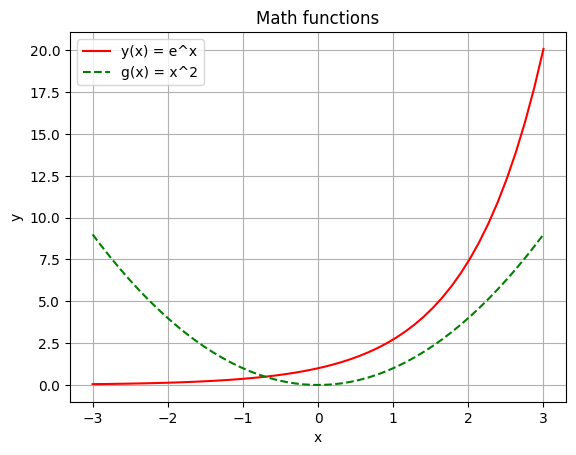

In [ ]:
x = np.linspace(-3, 3) # создадим интервал по x от - 3 до 3
y = np.exp(x) # построим график эксоненты
g = x**2 # построим график квадратичной функции
plt.figure()
plt.plot(x, y, color = 'red',label='y(x) = e^x')
plt.plot(x, g, color = 'g',linestyle ='--',label='g(x) = x^2')
plt.legend() # создадим легенду
plt.xlabel('x') # подпишем ось x
plt.ylabel('y') # подпишем ось y
plt.title('Math functions') # выведем название графика
plt.grid(True)


# Задача 6
Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:

plt.barh или ax.barh

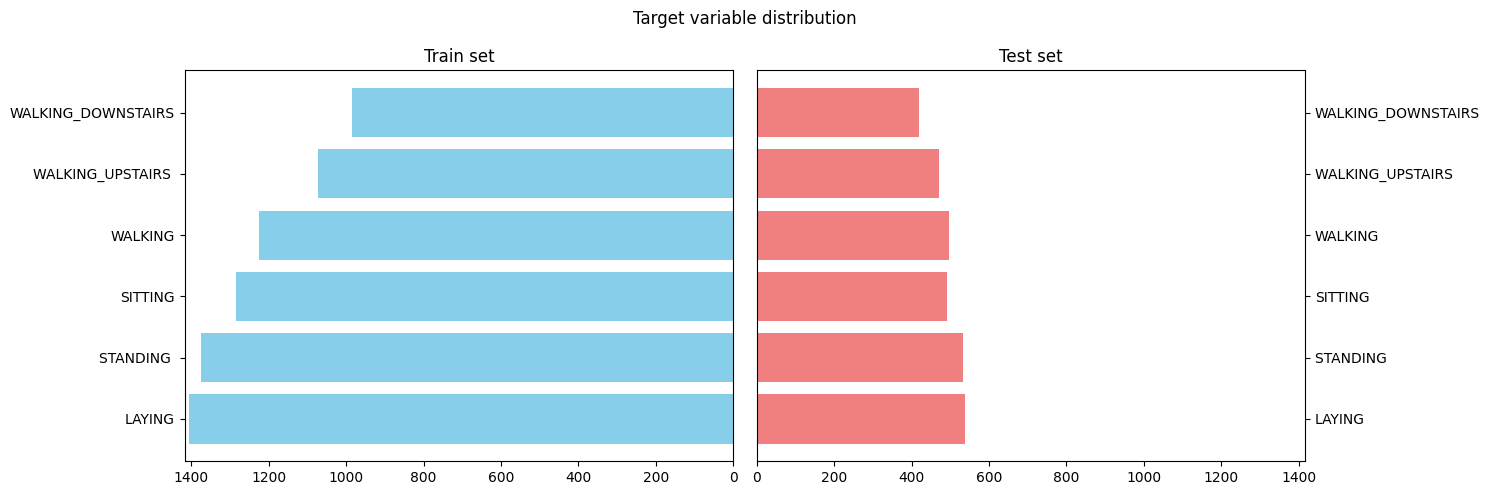

In [ ]:
categories = ['LAYING','STANDING ', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS ', 'WALKING_DOWNSTAIRS'] # создадим категории активностей
values1 = [1407, 1374, 1286, 1226, 1073,986] # зададим массив из значений train для активностей
values2 = [537, 532, 491, 496, 471,420] # зададим массив из значений test для активностей

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) #создадим плот где изобразим два графика

plt.suptitle('Target variable distribution')


ax1.barh(categories, values1, color='skyblue')
ax1.set_xlim(0, max(max(values1), max(values2))+10)
ax1.set_title('Train set')
ax1.invert_xaxis() # развернем 1 график


ax2.barh(categories, values2, color='lightcoral')
ax2.set_xlim(0, max(max(values1), max(values2))+10)
ax2.yaxis.tick_right() # сделаем подписи у 2 графика справа
ax2.set_title('Test set')

plt.tight_layout() # сделаем ось x в одинаковом масштабе



plt.show()




# Задача 7
Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными.

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:

sns.heatmap
методы get_text и set_text у атрибута texts графика

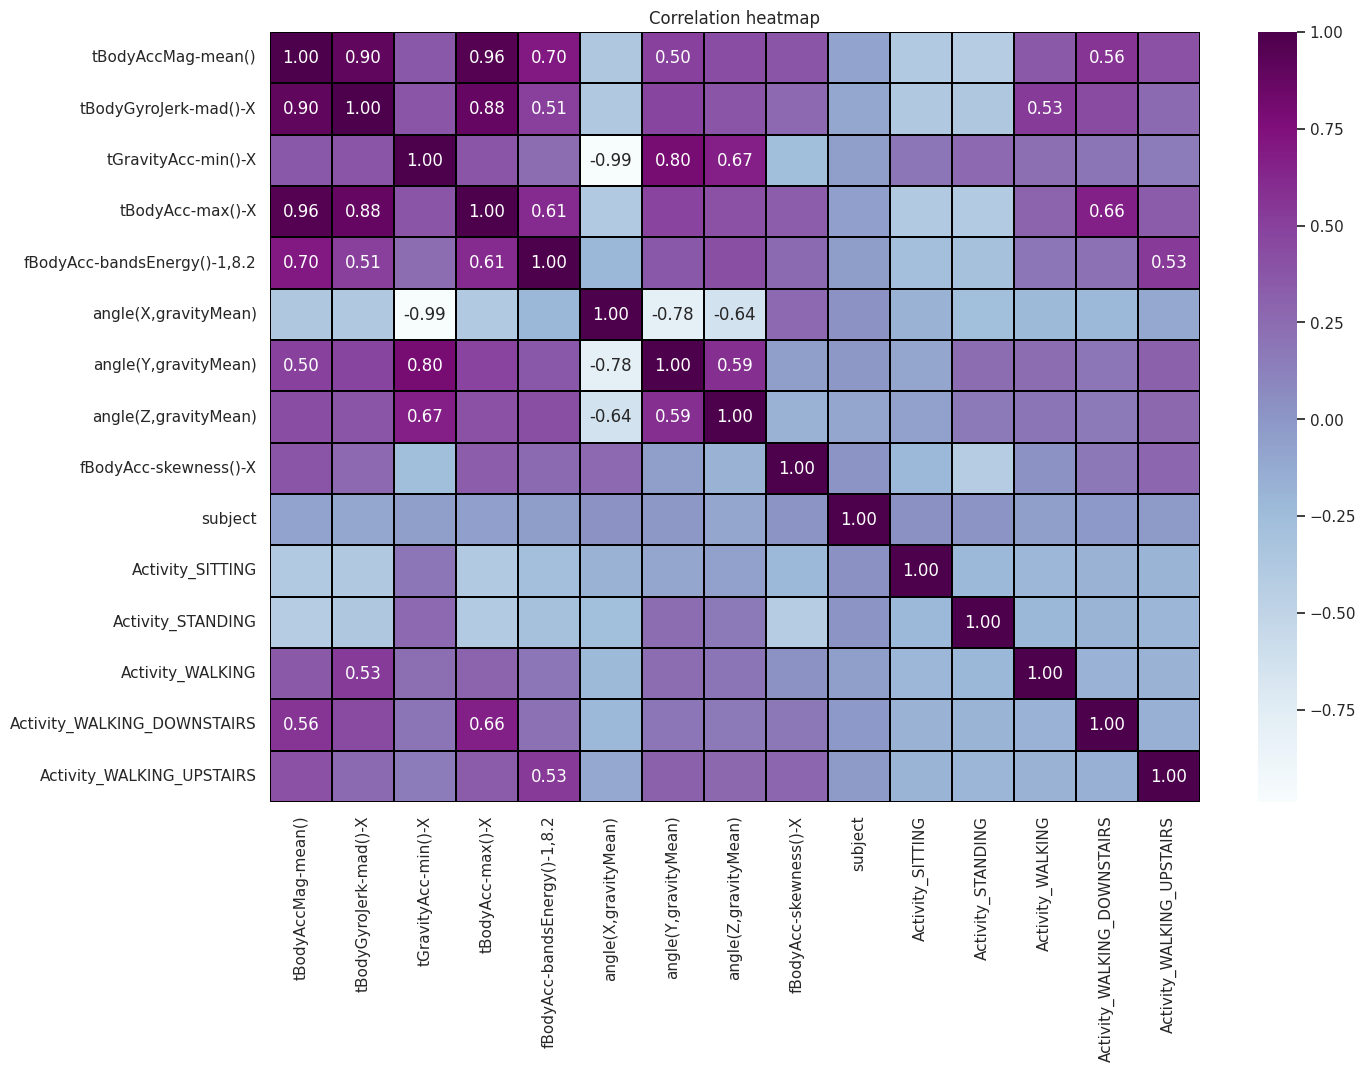

In [28]:
ax = sns.heatmap(train1.corr(), cmap="BuPu", annot=True, fmt="0.2f",linewidths=0.01, linecolor='black') # выведем таблицу корреляции для train
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")
plt.title("Correlation heatmap")
sns.set(rc={'figure.figsize':(15,10)})


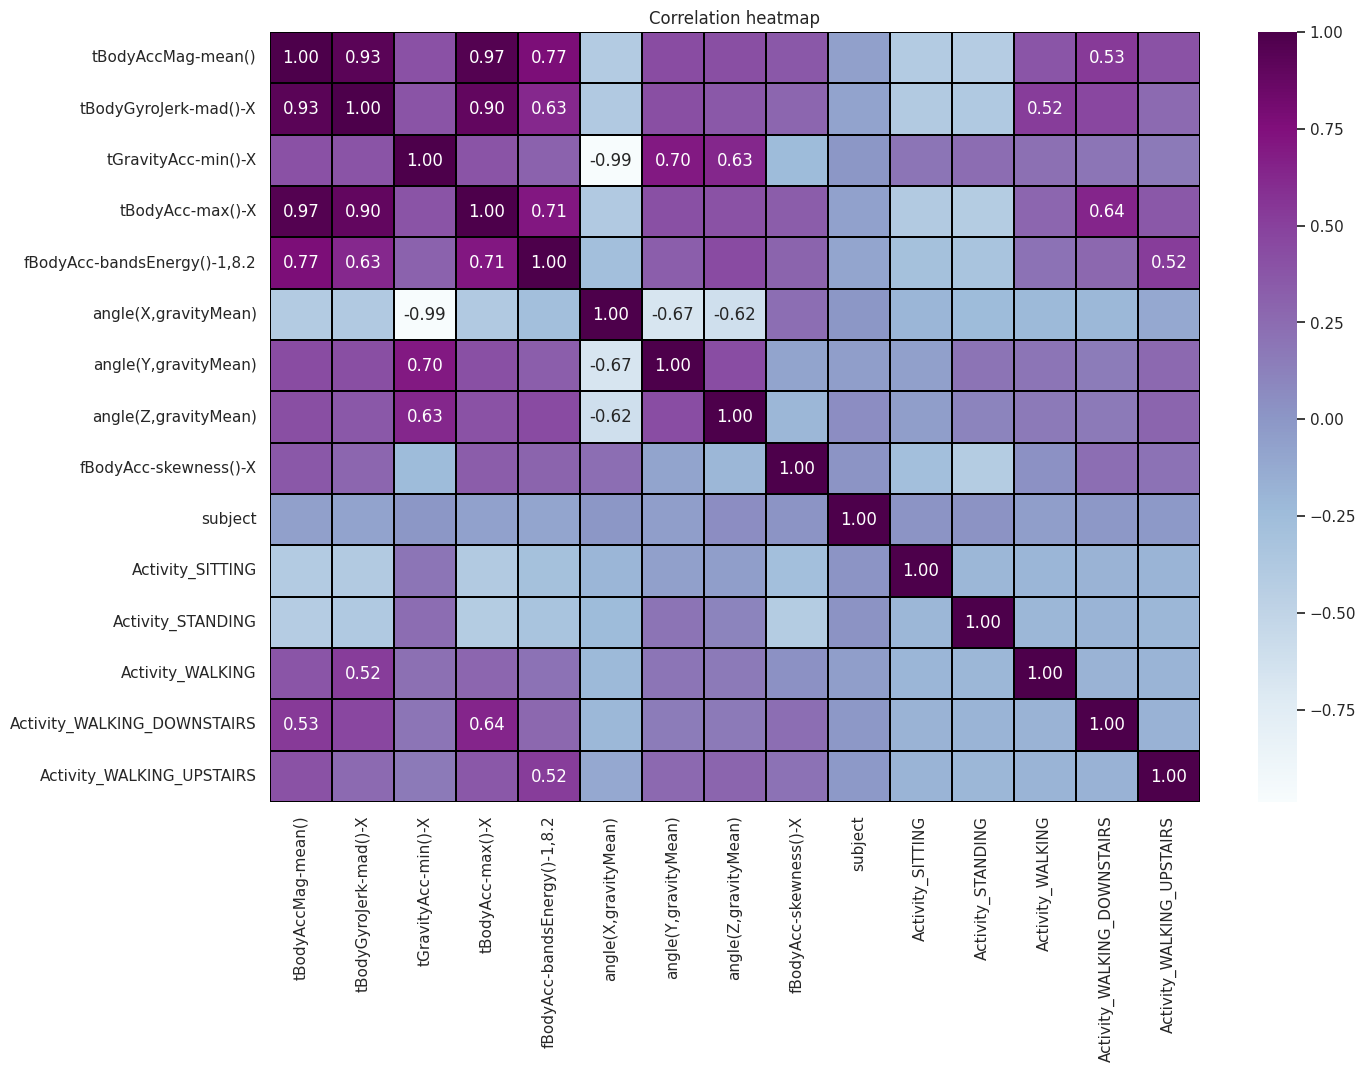

In [27]:
ax = sns.heatmap(test1.corr(), cmap="BuPu", annot=True, fmt="0.2f",linewidths=0.01, linecolor='black') # выведем таблицу корреляции для test
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")
plt.title("Correlation heatmap")
sns.set(rc={'figure.figsize':(15,10)})


Можем заметить, что в обоих выборках признак subject не имеет никакой связи с остальными признаками(что логично, так как номер респондента не связан с числовыми показателями), поэтому его следует исключить из рассмотрения корреляций

# Задача 8
Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

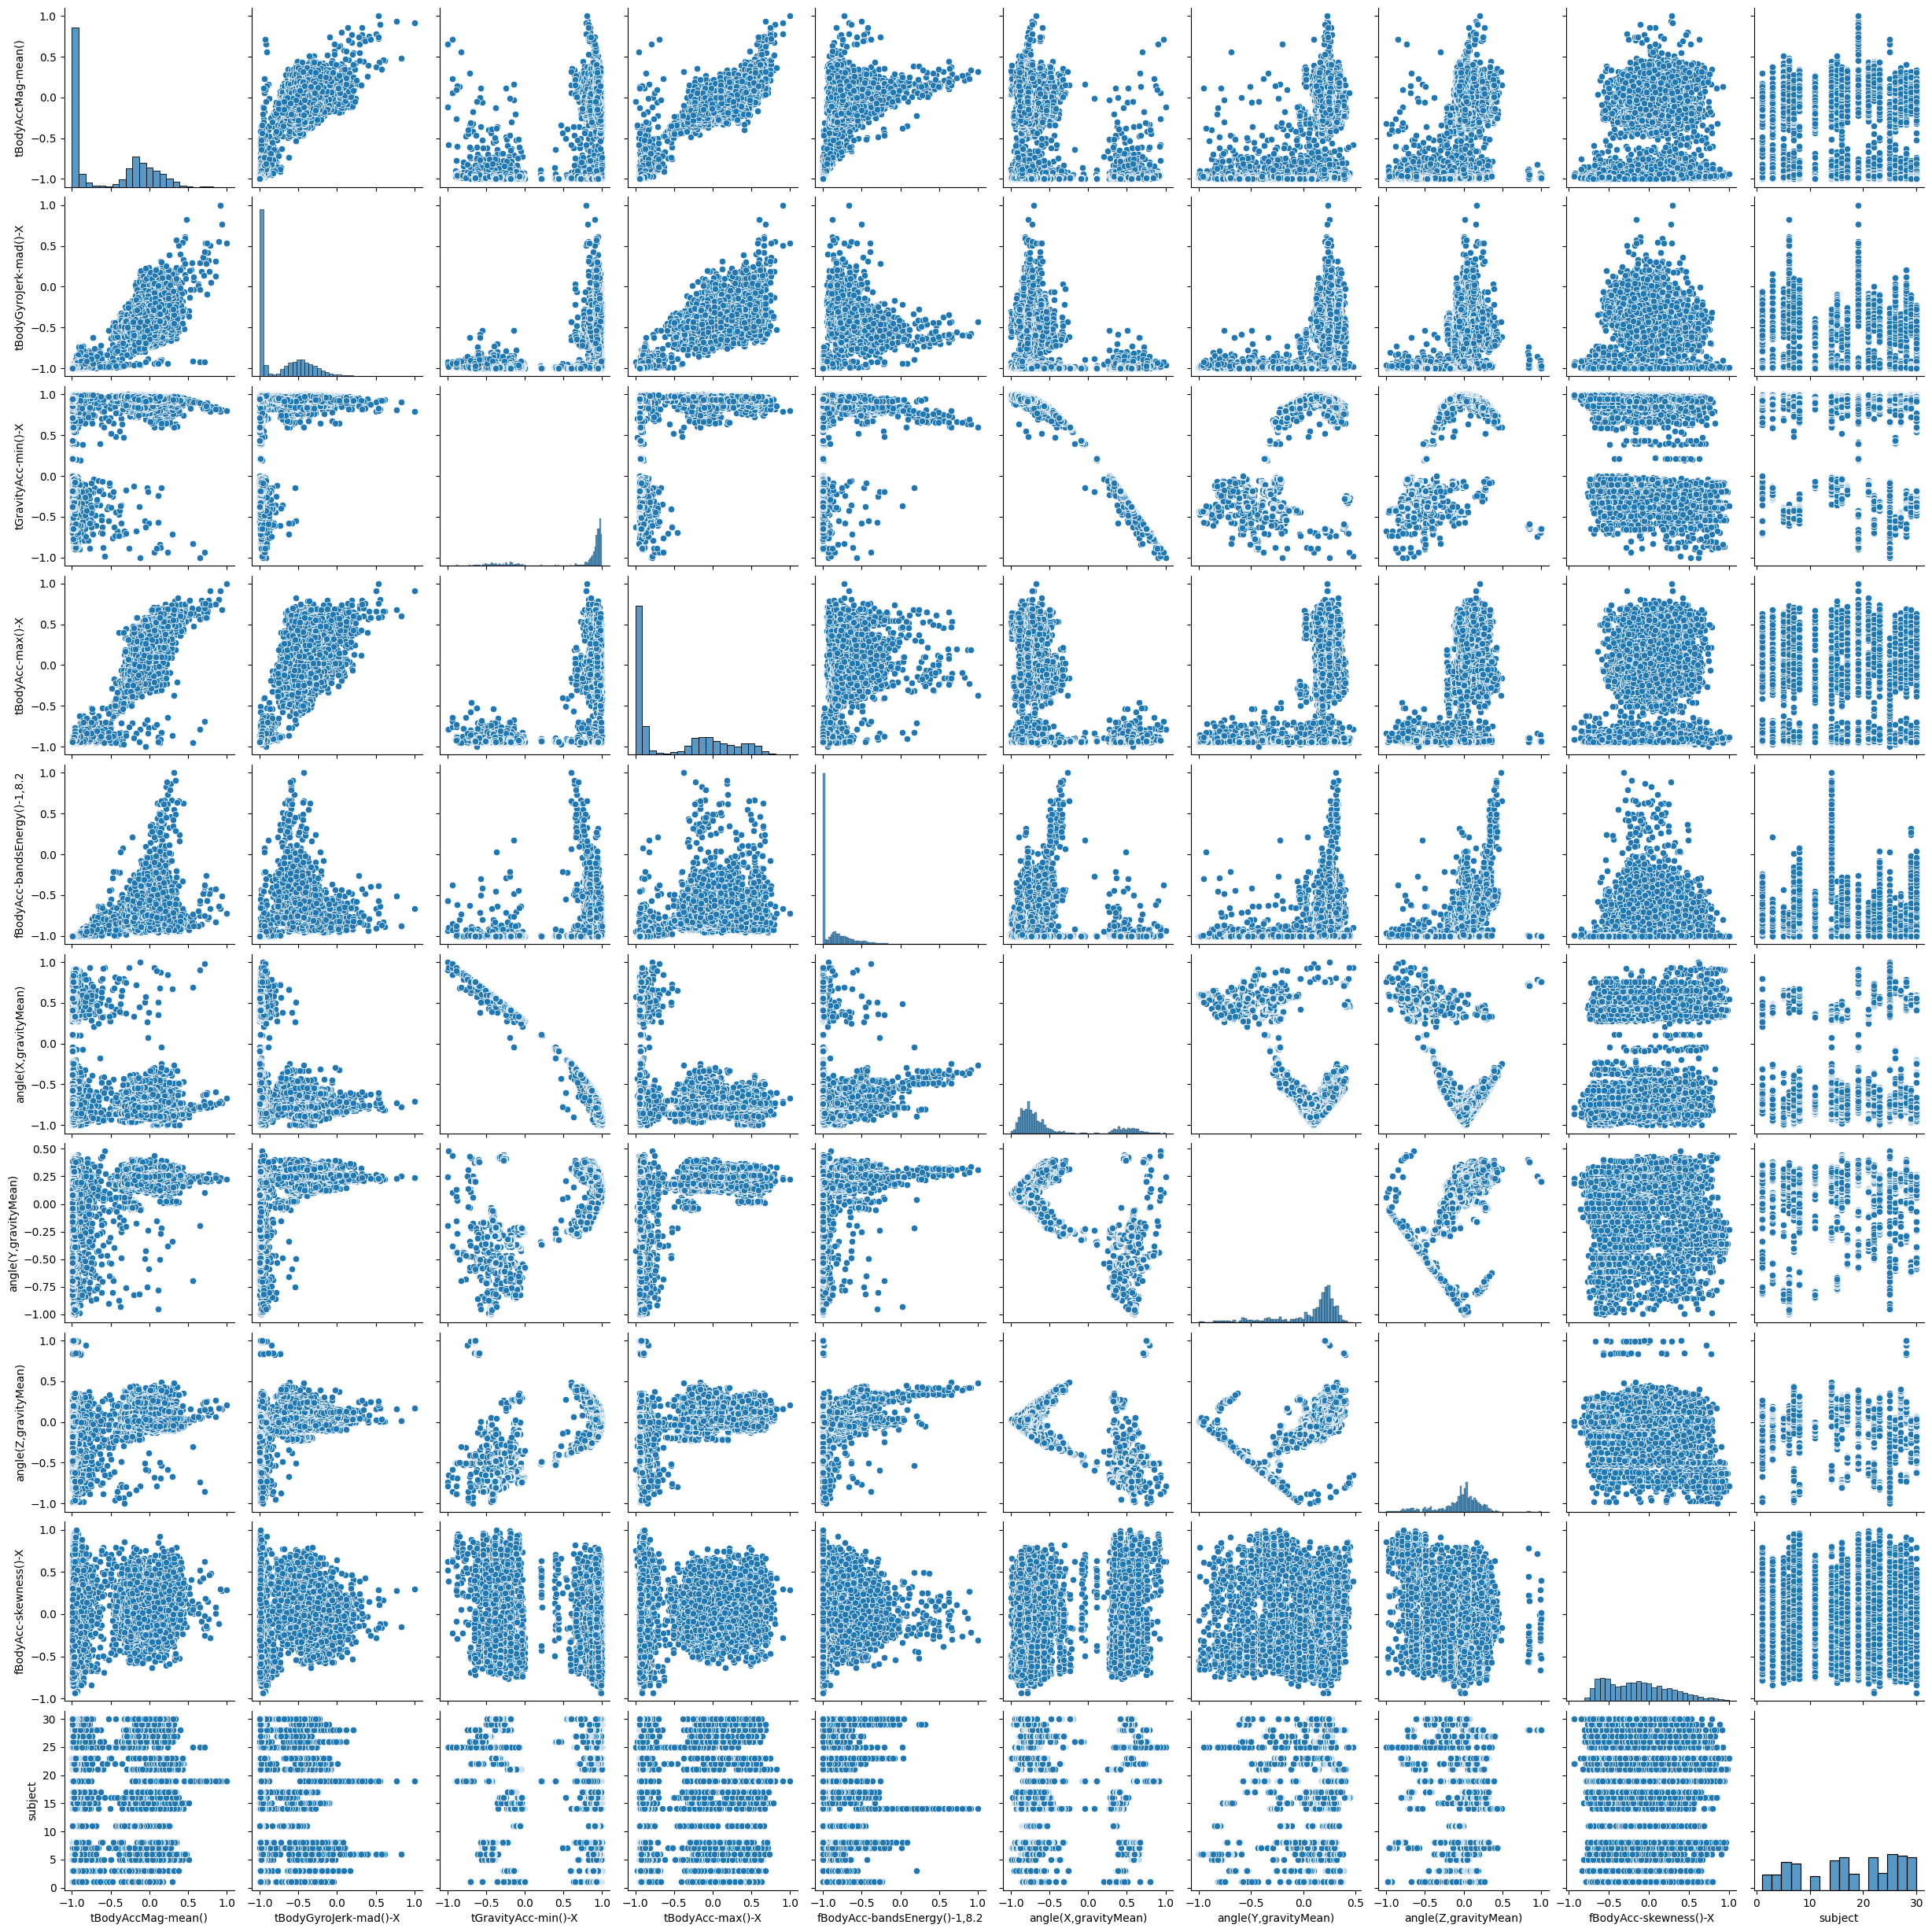

In [ ]:
sns.pairplot(train) # выведем pairplot

Этот вид графика нам позволяет увидеть отчетливо направление и силу связи, так например, видно, что точки, где есть признак suject разбросаны хаотично, не создаваяя линейной завимости, что нельзя например сказать про рисунок в 1 столбце и 2 строке, там отчетливо видна положительная линейная зависимость, что говорит о близком к единице коэффициенту корреляции.
Но главный недостаток данного метода, что человеку тяжело качественно проанализировать сразу 100 графиков и сделать разумные выводы.


# Задача 9
Попробуем проверить гипотезу. Отобразите плотность распределения (kde) tBodyAccMag-mean() для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).


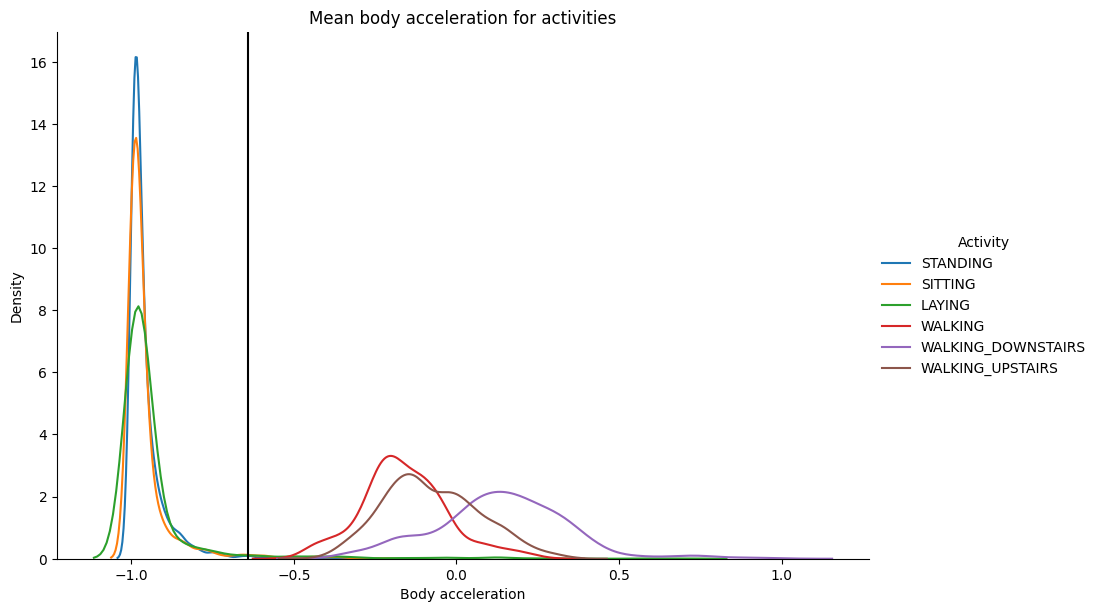

In [ ]:
kde = sns.FacetGrid(data=train, hue="Activity", legend_out=True, height=6, aspect=1.5)
kde = kde.map(sns.kdeplot, "tBodyAccMag-mean()")
kde.add_legend(fontsize=10)
plt.title('Mean body acceleration for activities')
plt.xlabel("Body acceleration")
plt.axvline(-0.64,color = 'black') # выберем значение равное - 0.64

In [ ]:
static = (train['Activity'] == 'STANDING') | (train['Activity'] == 'SITTING') | (train['Activity'] == 'LAYING')
dynamic = (train['Activity'] == 'WALKING') | (train['Activity'] == 'WALKING_UPSTAIRS') | (train['Activity'] == 'WALKING_DOWNSTAIRS')



In [ ]:
((train['Activity'] == 'STANDING')[train['tBodyAccMag-mean()'] < -0.64] | (train['Activity'] == 'SITTING')[train['tBodyAccMag-mean()'] < -0.64] | (train['Activity'] == 'LAYING')[train['tBodyAccMag-mean()'] < -0.64]).sum()/static.sum()

0.9771330218834522

Посчитаем долю правильных ответов, которая дает выбранная нами прямая(равная -0.64) для группы static(STANDING,LAYING,SITTING). Мы делим количество значений из нашей группы которые меньше выбранного нами значения на общее количество значений в группе и получаем достаточно большую долю правильных ответов для группы static

In [ ]:
((train['Activity'] == 'WALKING')[train['tBodyAccMag-mean()'] > -0.64] | (train['Activity'] == 'WALKING_UPSTAIRS')[train['tBodyAccMag-mean()'] > -0.64] | (train['Activity'] == 'WALKING_DOWNSTAIRS')[train['tBodyAccMag-mean()'] > -0.64]).sum()/dynamic.sum()

1.0

Посчитаем долю правильных ответов, которая дает выбранная нами прямая(равная -0.64) для группы dynamic(WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS). Мы делим количество значений из нашей группы которые меньше выбранного нами значения на общее количество значений в группе и получаем максимальную долю правильных ответов для группы dinamic

Можно предположить, что данный признак так хорошо разделяет группы, потому что сильно зависит от активности, ускорение тело увеличивается при ходьбе, поднимании, спускании на лестнице, и в тоже время оно минимально во время статических активностей.

# Задача 10
Попробуйте нарисовать "ящики с усами" для angle(X,gravityMean) с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).



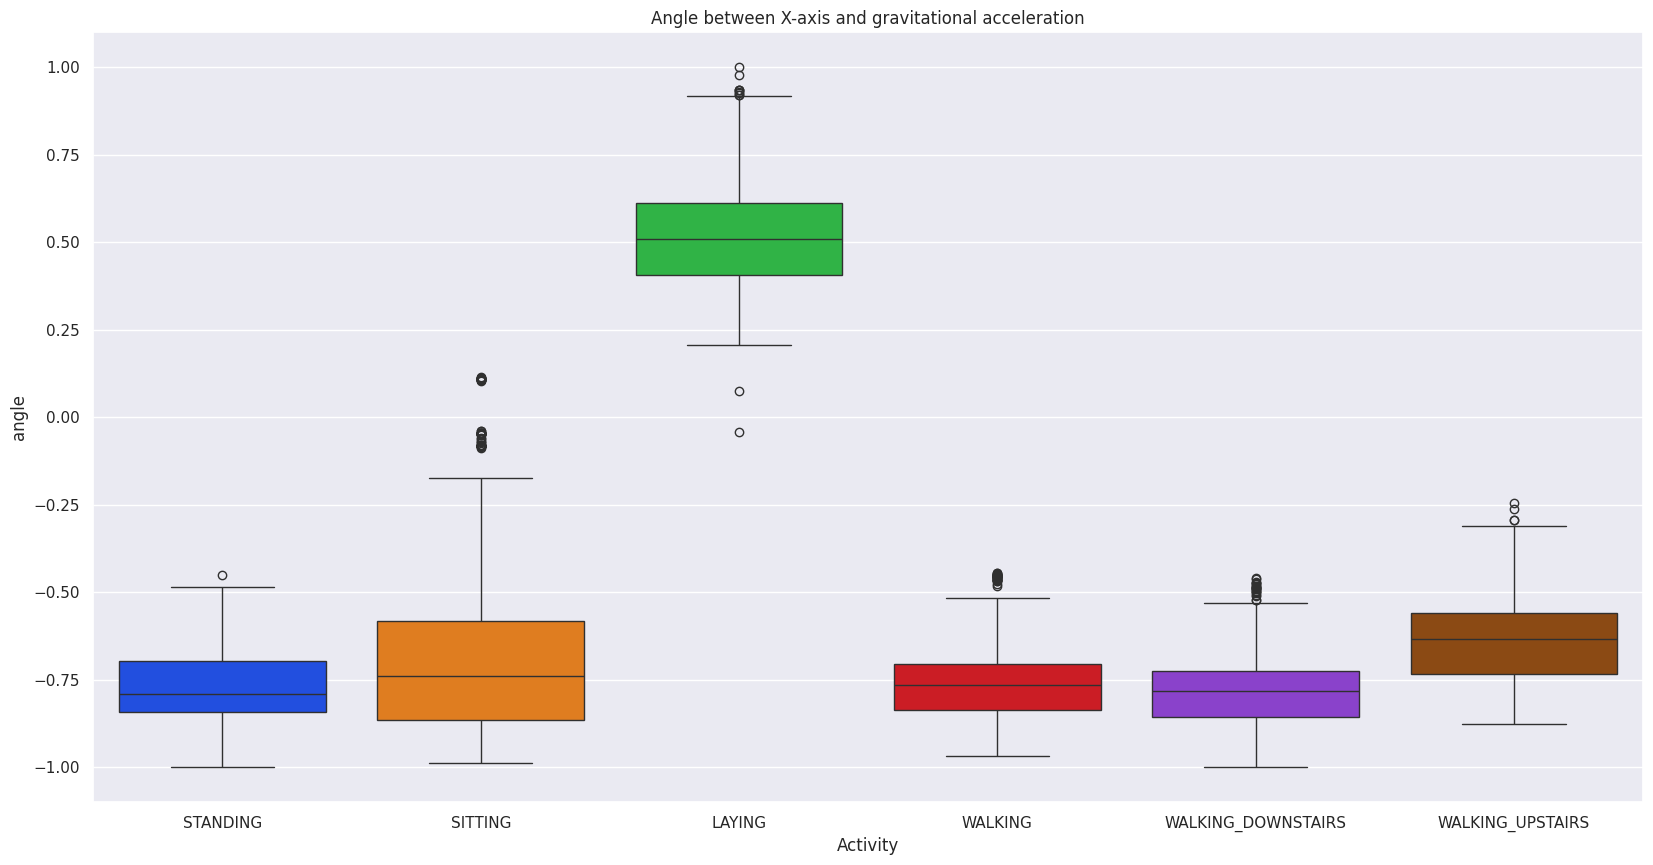

In [ ]:
sns.boxplot(x="Activity", y="angle(X,gravityMean)", data=train, palette ='bright')
sns.set(rc={'figure.figsize':(20,10)}) # изменим size графика

plt.title('Angle between X-axis and gravitational acceleration')
plt.ylabel('angle')
plt.show()



Анализируя данный график, можно заметить, что у каждой активности есть выбросы(значения, которые больше или меньше 1.5IQR), кроме того, ярко видно, как выделяется среди других активность LAYING(остальные расположены практически одинаково (ниже 0)), значения же LAYING лежат в интервале от 0.2 до 0.9. Данное наблюдение можно обосновать тем, что при положении лежа угол между осью X и усредненной гравитационной составляющей ускорения положителен.

# Задача 11
Посмотрим теперь на tBodyAcc-max()-X. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:

sns.violinplot

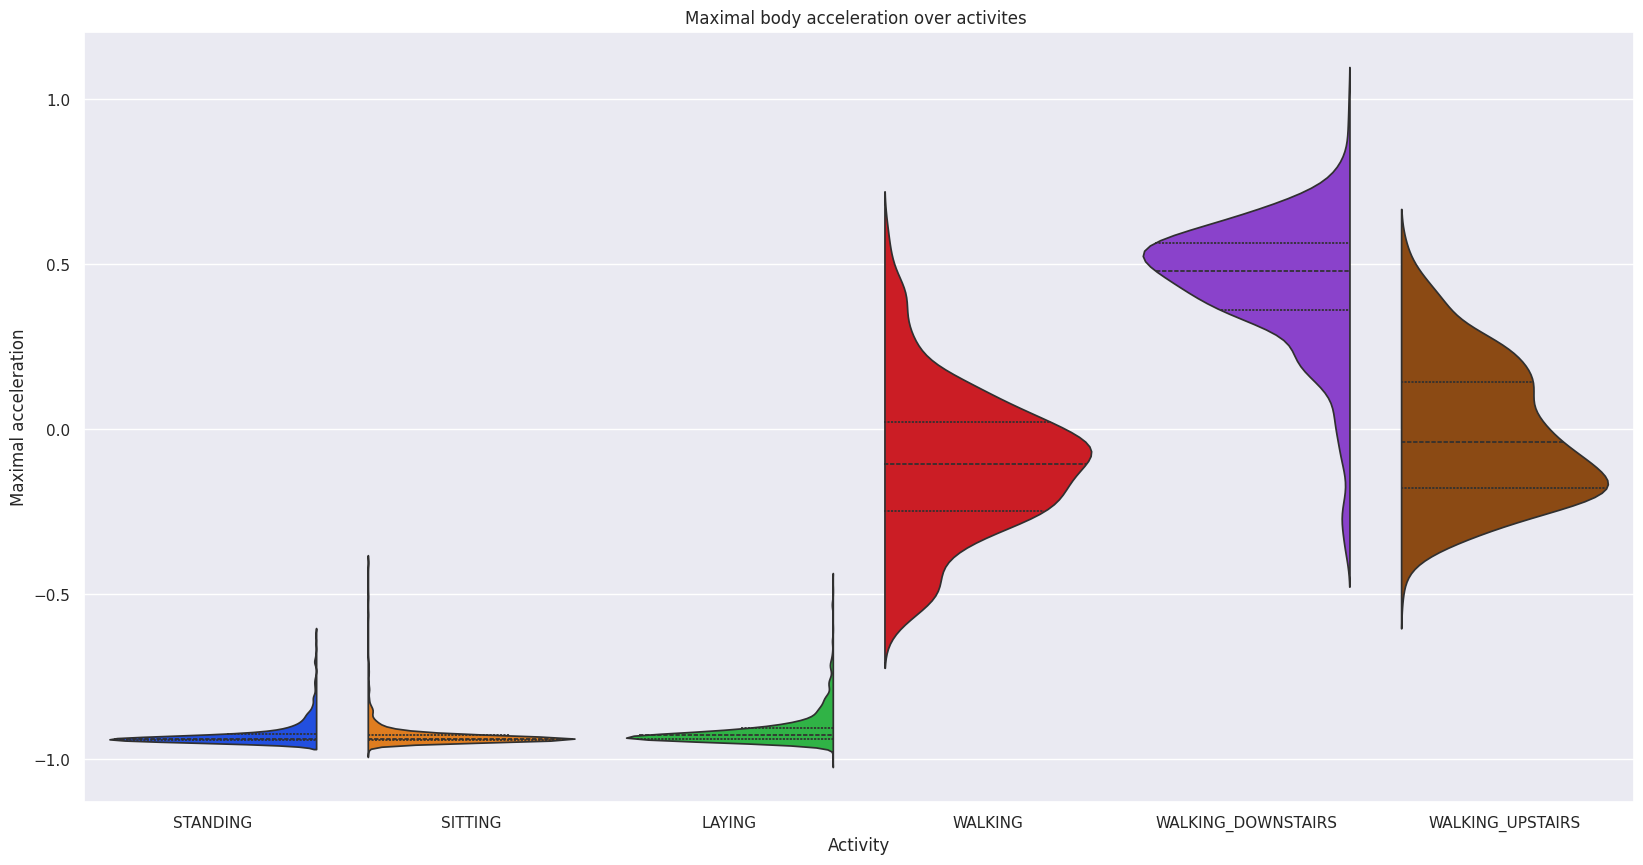

In [ ]:
sns.violinplot(x="Activity", y="tBodyAcc-max()-X", data=train, palette ='bright',split=True,inner="quart")
sns.set(rc={'figure.figsize':(18,10)}) # изменим size графика

plt.title('Maximal body acceleration over activites ')
plt.ylabel('Maximal acceleration')
plt.show()


Можем заметить, что максимальное ускорение тела при статических активностях примерно одинаково, соответсвенно и сами графики расположены практически на одном уровне, об этом нам говорит значения квартилей, у динамических активностей дела обстоят немного по-другому, если про активности WALKING И WALKING_UPSTAIRS можно сказать что они так же примерно одинаковы, то про признак WALKING_DOWNSTAIRS, так сказать нельзя. Действительно, при спуске с лестницы ускорение нашего тела становитсябольше, что и показывает данный график.

# Задача 12

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения fBodyAcc-bandsEnergy()-1,8.2 для динамичных активностей (boxenplot - немного измененый "ящик с усами") и angle(Y,gravityMean) для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.


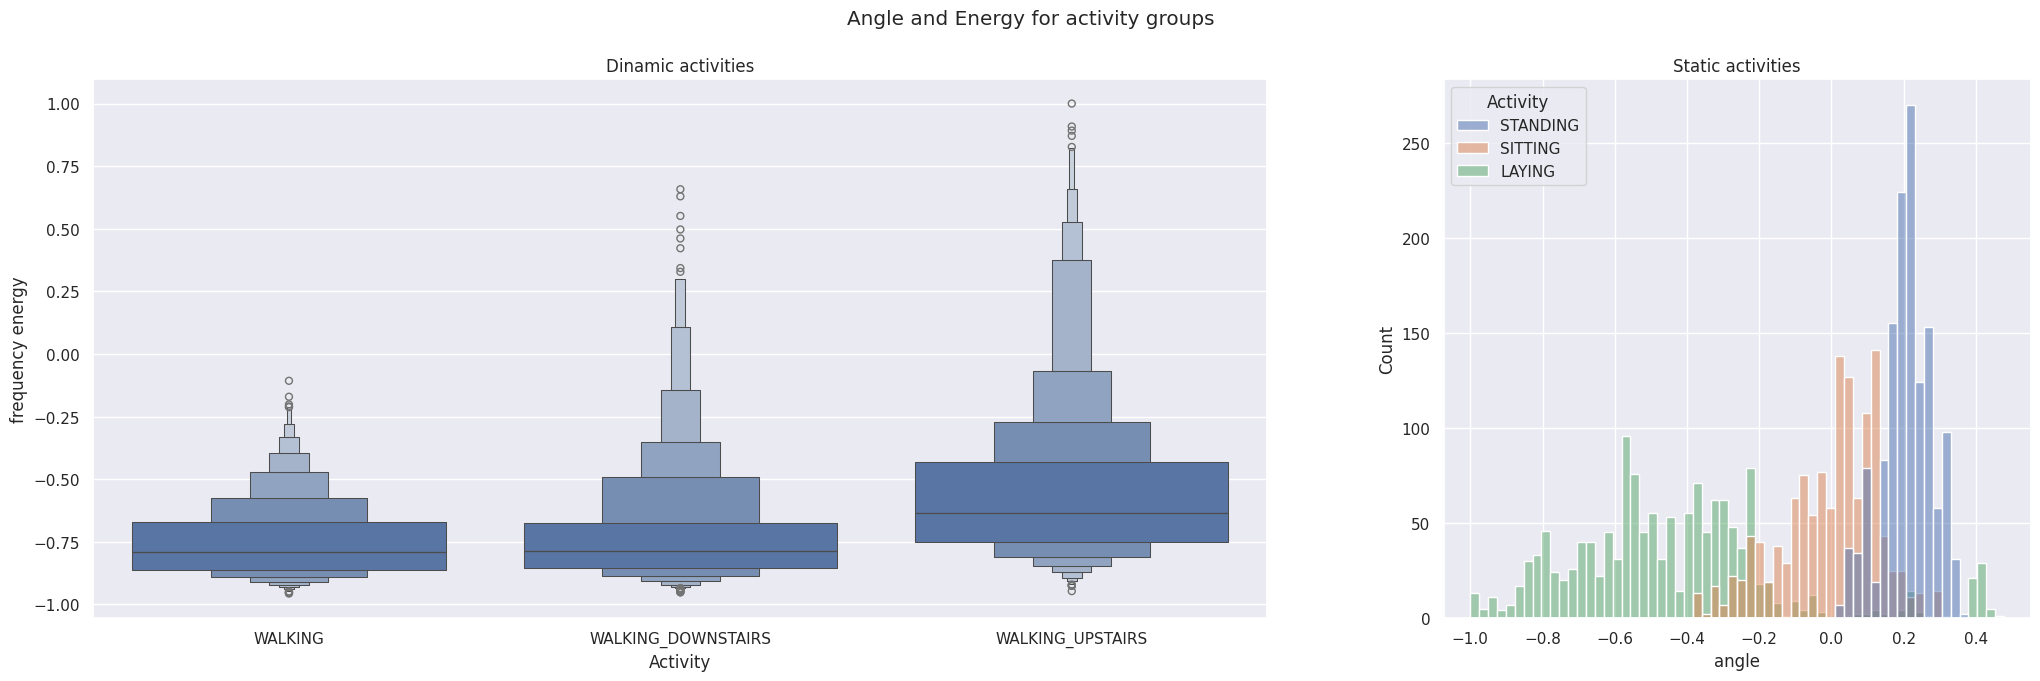

In [39]:
static = train[(train["Activity"] == 'LAYING') | (train['Activity'] == 'SITTING') | (train['Activity'] == 'STANDING')] # выделим категорию static
dinamic = train[(train["Activity"] == 'WALKING') | (train['Activity'] == 'WALKING_UPSTAIRS') | (train['Activity'] == 'WALKING_DOWNSTAIRS')] # выделим категорию dinamic
plt.subplots(1, 2, figsize = (25,7),gridspec_kw={'width_ratios': [2, 1]})
plt.suptitle("Angle and Energy for activity groups")

plt.subplot(1, 2, 1) # работаем с 1 графиком
sns.boxenplot(x='Activity',y='fBodyAcc-bandsEnergy()-1,8.2',data = dinamic)
plt.title('Dinamic activities')
plt.ylabel('frequency energy')

plt.subplot(1, 2, 2) # работаем со 2 графиком
sns.histplot(data = static,x= 'angle(Y,gravityMean)',hue='Activity',linewidth=1,bins = 60)
plt.title('Static activities')
plt.xlabel('angle')

plt.show()





На первом графике, выделяется среди остальных активность WALKING, все значения которой по признаку энергия ускорения тела в интервале частоты лежат ниже 0, что можно объяснить тем, что тело теряет энергию при замедлении. Что касается второго графика, то тут также заметно выделение активности STANDING cреди статичных активностей, подавляющее количество значений этой категории лежит в интервале от 0 до 0.35,это можно объяснить тем, что в положении стоя , когда тело находится в вертикальном положении, гравитационная составляющая ускорения направлена вниз, вдоль оси Y.Однако, в реальности тело не может быть идеально вертикальным.В результате, гравитационная составляющая ускорения не будет идеально совпадать с осью Y. Она будет немного отклоняться от вертикали. Это отклонение и определяет угол между осью Y и усредненной гравитационной составляющей ускорения.Это означает, что гравитационная составляющая ускорения может отклоняться от вертикали на угол до 35 градусов.


# Задача 13
Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения fBodyAcc-skewness()-X по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по fBodyAcc-skewness()-X? А если взять только те строки, где fBodyAcc-skewness()-X < -0.376, и теперь вывести боксплот распределения angle(Y,gravityMean) по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?


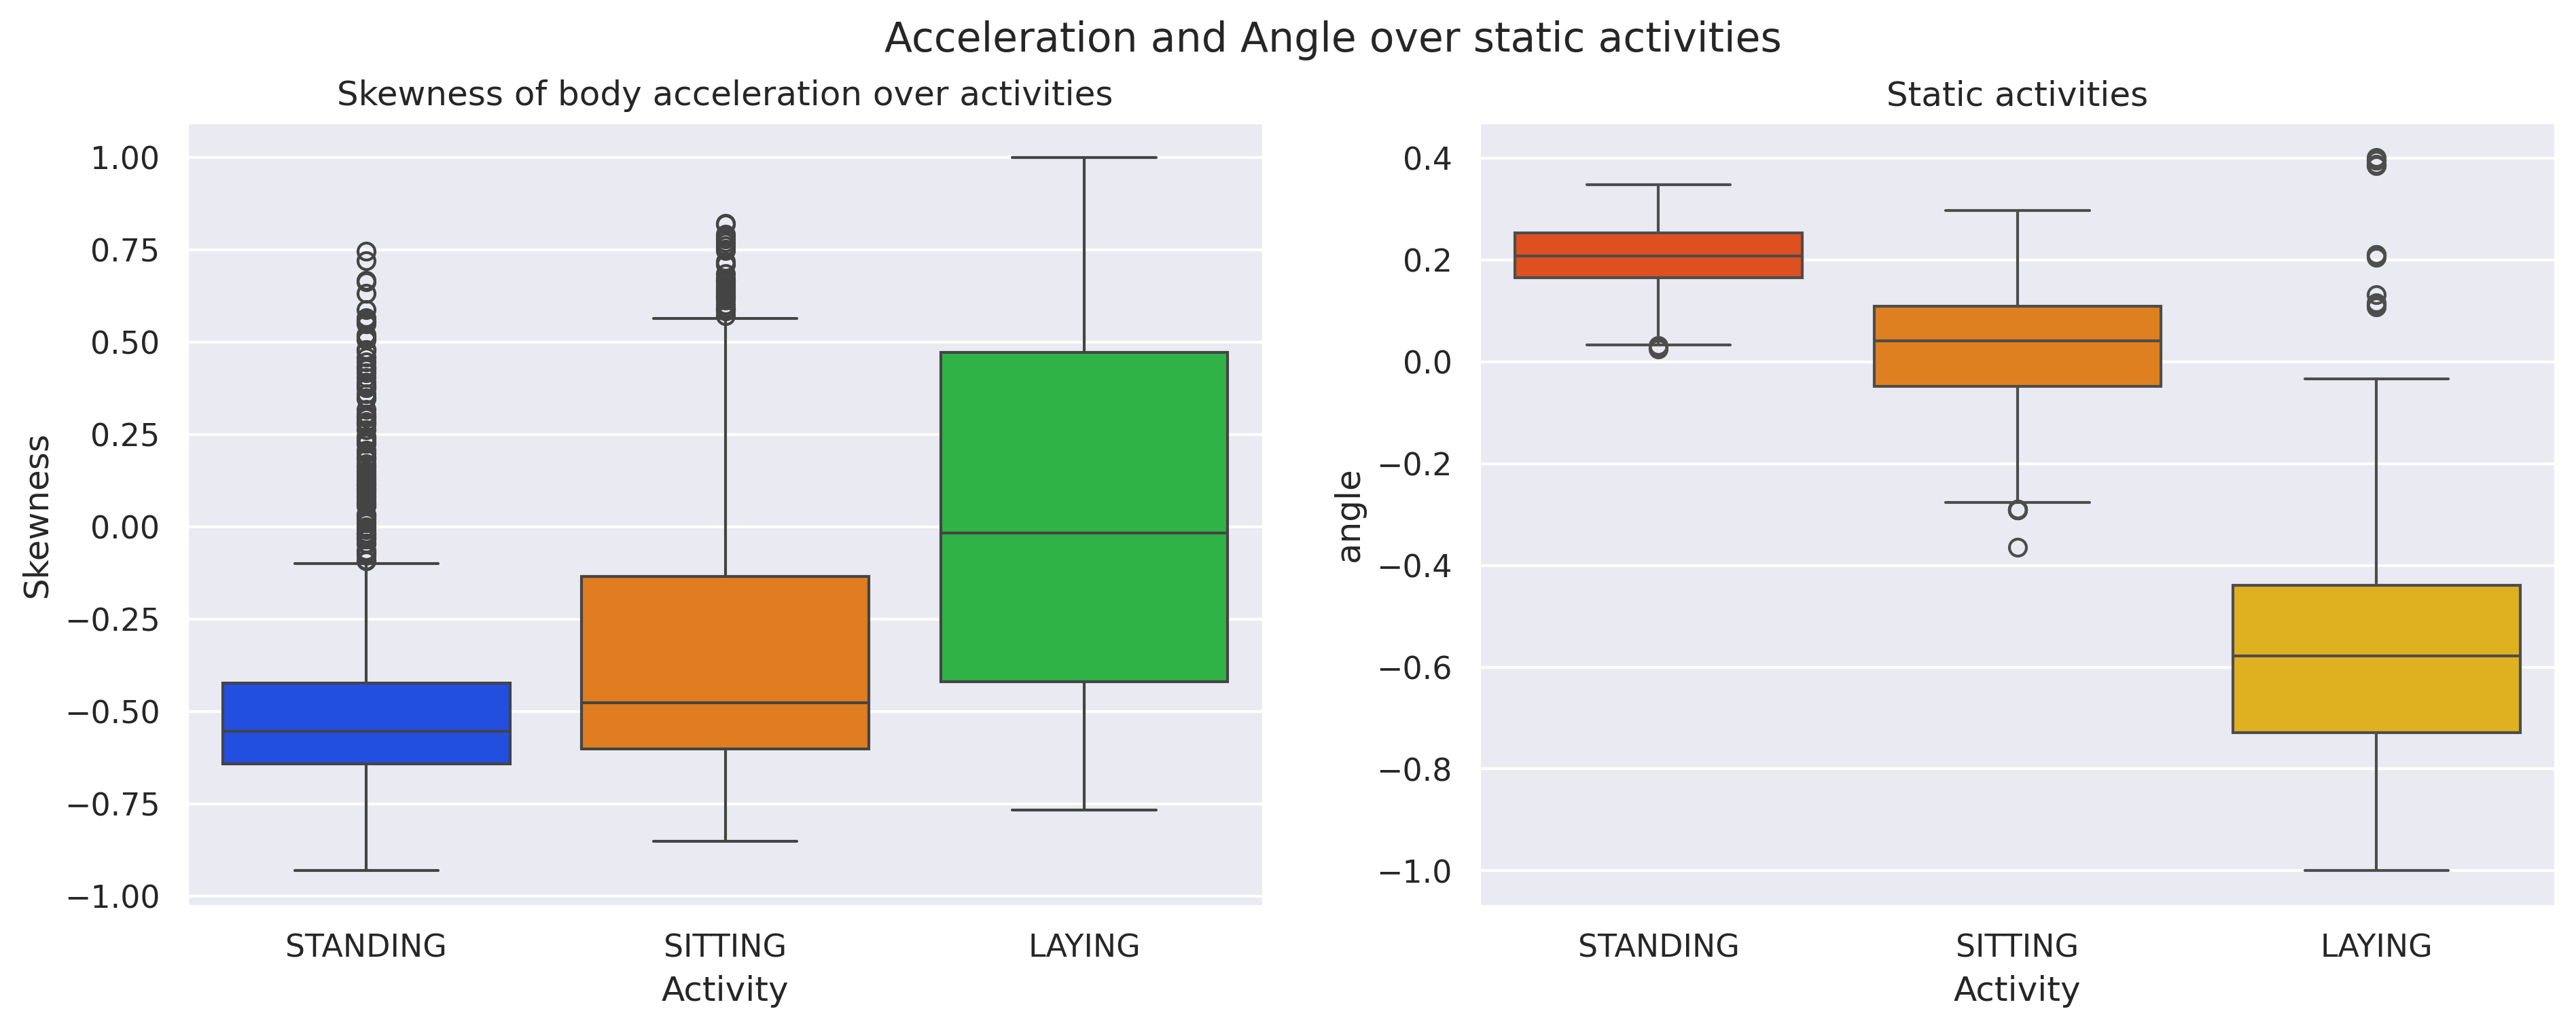

In [ ]:
plt.figure(figsize=(15, 5), dpi=300)
plt.suptitle("Acceleration and Angle over static activities")

plt.subplot(1, 2, 1)
sns.boxplot(x='Activity',y='fBodyAcc-skewness()-X',data = static, palette ='bright' )
plt.title('Skewness of body acceleration over activities')
plt.ylabel('Skewness')

plt.subplot(1, 2, 2)
static1 = static[(static['fBodyAcc-skewness()-X'] < -0.376)] # создадим датасет где fBodyAcc-skewness()-X < -0.376, чтобы затем вывести боксплот распределения angle(Y,gravityMean) по разным активностямна 2 графика
sns.boxplot(data = static1 ,x='Activity',y= 'angle(Y,gravityMean)',palette = 'autumn')
plt.title('Static activities')
plt.xlabel('Activity')
plt.ylabel('angle')

plt.show()

Можно заметить, что среди статичных активностей выделилась активность LAYING, медиана ассиметричности частоты ускорения тела в положении лежа практически равна 0,в то время как угол между осью Y в этом положении минимален.

# Задача 14
Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение tBodyAcc-max()-X на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог tBodyAcc-max()-X < 0.157. Для таких строк постройте диаграмму рассеяния для признака tGravityAcc-min()-X. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где tBodyAcc-max()-X < 0.157, выбрать по некоторому порогу для tGravityAcc-min()-X строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!


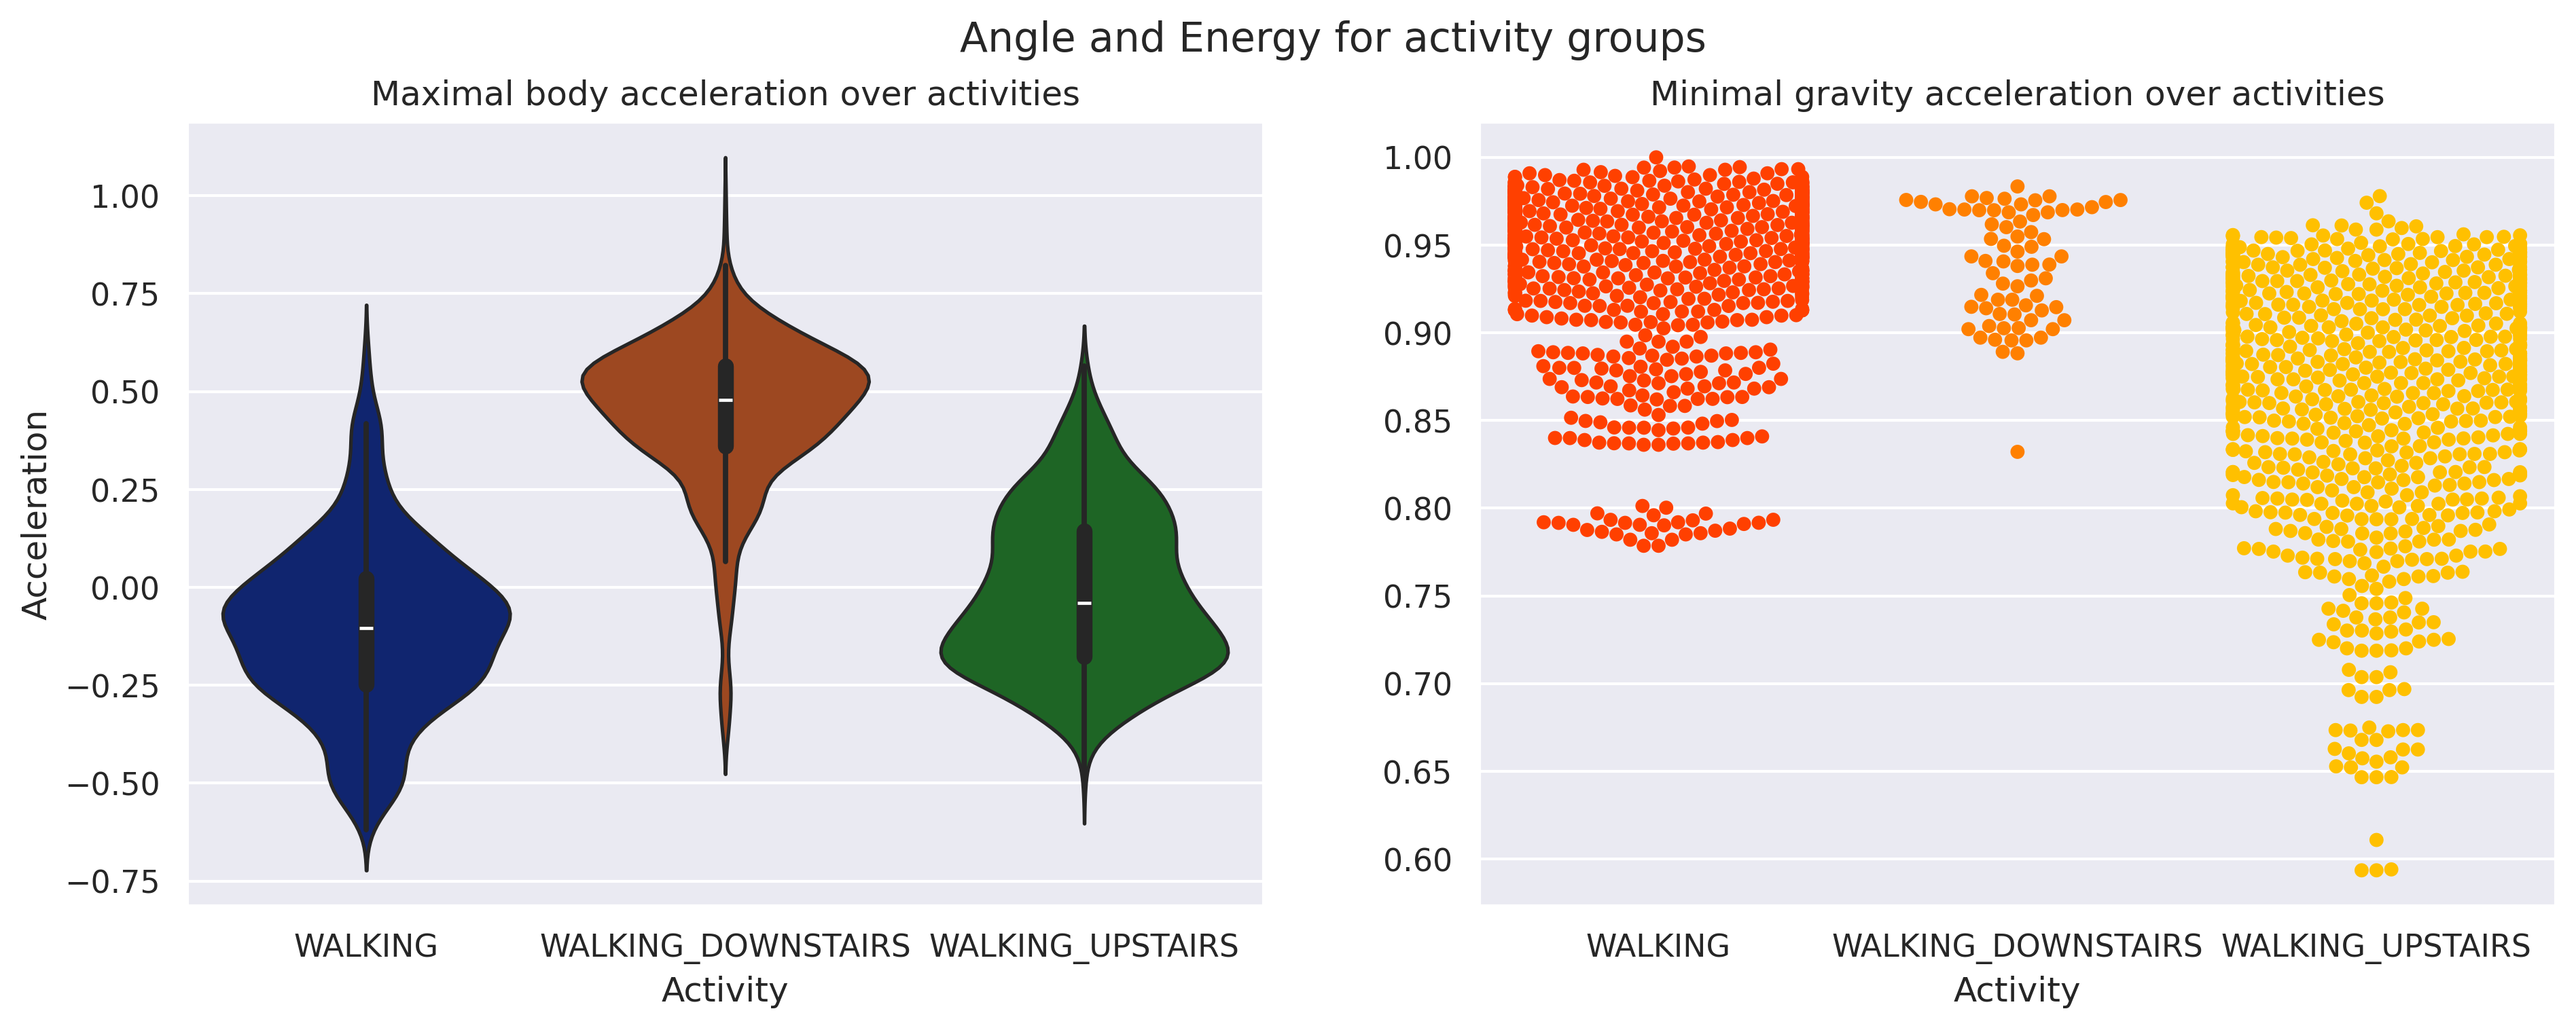

In [52]:
plt.figure(figsize=(15, 5), dpi=300)
plt.suptitle("Angle and Energy for activity groups")

plt.subplot(1, 2, 1)
sns.violinplot(x='Activity',y='tBodyAcc-max()-X',data = dinamic, palette ='dark' )
plt.title('Maximal body acceleration over activities')
plt.ylabel('Acceleration')

plt.subplot(1, 2, 2)
dinamic1 = dinamic[(dinamic['tBodyAcc-max()-X'] < 0.157)] #
sns.swarmplot(data = dinamic1,x='Activity',y= 'tGravityAcc-min()-X',palette = 'autumn')
plt.title('Minimal gravity acceleration over activities')
plt.xlabel('Activity')
plt.ylabel('') # убираем подпись у второго графика






plt.show()

На втором графике отчетливо выделяется активность WALKING_UPSTAIRS, видно, что только наблюдения этой активности лежат ниже 0.77

# Задача 15
Теперь попробуем более интерактивные графики. Установите библиотеку plotly (обычно pip install plotly или conda install plotly). Синтаксис очень похож на seaborn, но вот документация для plotly.express.

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [41]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 6min 55s, sys: 211 ms, total: 6min 55s
Wall time: 4min 1s


Теперь нарисуйте scatter-график через plotly.express для df_2_comp с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [42]:
import plotly.express as px
fig_2d = px.scatter(df_2_comp, x='x', y='y', color='Activity', title='t-SNE 2D Projection')
fig_2d.show()

Мы видим как отчетливо отделены скопления точек одного цвета, что делает возможным отделить разные активности линиями.

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через plotly.express для df_3_comp с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [43]:
fig_3d = px.scatter_3d(df_3_comp, x='x', y='y', z='z', color='Activity', title='t-SNE 3D Projection')
fig_3d.show()

Можем заметить, что получился красивый и показательный  3-d график, при помощи плоскости можно разделить и структурировать признаки по группам.

# Задача 16
Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция accuracy_score выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно

In [44]:
def predict(df: pd.DataFrame):
  y_true = df['Activity'] # создадим вектор из верных значений
  df1 = df.copy()
  df = df.drop('Activity',axis=1)
  df1['Activity'] = 'f' #
  y_pred = df1['Activity'] # пускай наш столбец из ypred будет состоять из f, и мы будем  заменять каждый раз значений
  # в функции ниже будем,анализируя наши проделанные наблюдения, подбирать числа так, чтобы наша accuracy была как можно больше
  for i in df.index:
    if df.iloc[i]['tBodyAccMag-mean()'] <= - 0.46:
      if (df.iloc[i]['angle(X,gravityMean)'] > 0.18):
               df1.iloc[i, df1.columns.get_loc('Activity')] = 'LAYING'
      elif  0.13 < (df.iloc[i]['angle(Y,gravityMean)'])< 0.43:
        df1.iloc[i, df1.columns.get_loc('Activity')] = 'STANDING'
      else:
        df1.iloc[i, df1.columns.get_loc('Activity')] = 'SITTING'


    else:
      if df1.iloc[i]['tBodyAcc-max()-X'] > 0.27:
        df1.iloc[i, df1.columns.get_loc('Activity')] = 'WALKING_DOWNSTAIRS'
      elif  df1.iloc[i]['tGravityAcc-min()-X'] < 0.95:
        df1.iloc[i, df1.columns.get_loc('Activity')] = 'WALKING_UPSTAIRS'
      else:
        df1.iloc[i, df1.columns.get_loc('Activity')] = 'WALKING'




  return y_pred
  pass

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [45]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.8355549510337323
Accuracy on test set => 0.7855446216491347
